<a href="https://colab.research.google.com/github/rafiqmyura/Learn-Machine-Learning/blob/main/Throid_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from IPython.display import display, Markdown
from tensorflow.keras.layers import Dense

import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data Belajar'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/drive/MyDrive/Data Belajar/train.csv
/content/drive/MyDrive/Data Belajar/test.csv
/content/drive/MyDrive/Data Belajar/sample_submission.csv
/content/drive/MyDrive/Data Belajar/data_description.txt
/content/drive/MyDrive/Data Belajar/submission.csv
/content/drive/MyDrive/Data Belajar/Thyroid_Diff.csv


In [7]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 5.4 MB/s eta 0:00:00


In [8]:
df = pd.read_csv("/content/drive/MyDrive/Data Belajar/Thyroid_Diff.csv")

df.shape

In [10]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

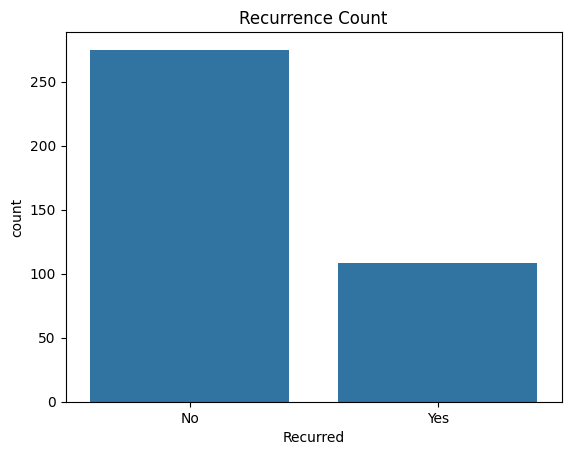

In [12]:
sns.countplot(x='Recurred', data=df)
plt.title('Recurrence Count')
plt.show()

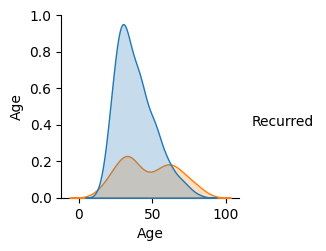

In [13]:
sns.pairplot(df, hue='Recurred')
plt.show()

In [15]:
print(df.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


## Menseleksi Usia, Rokok/non Rokok, Resiko, T,N,M, tahapan, dan Respon.

Text(0.5, 1.0, 'Correlation Matrix Selected Subset')

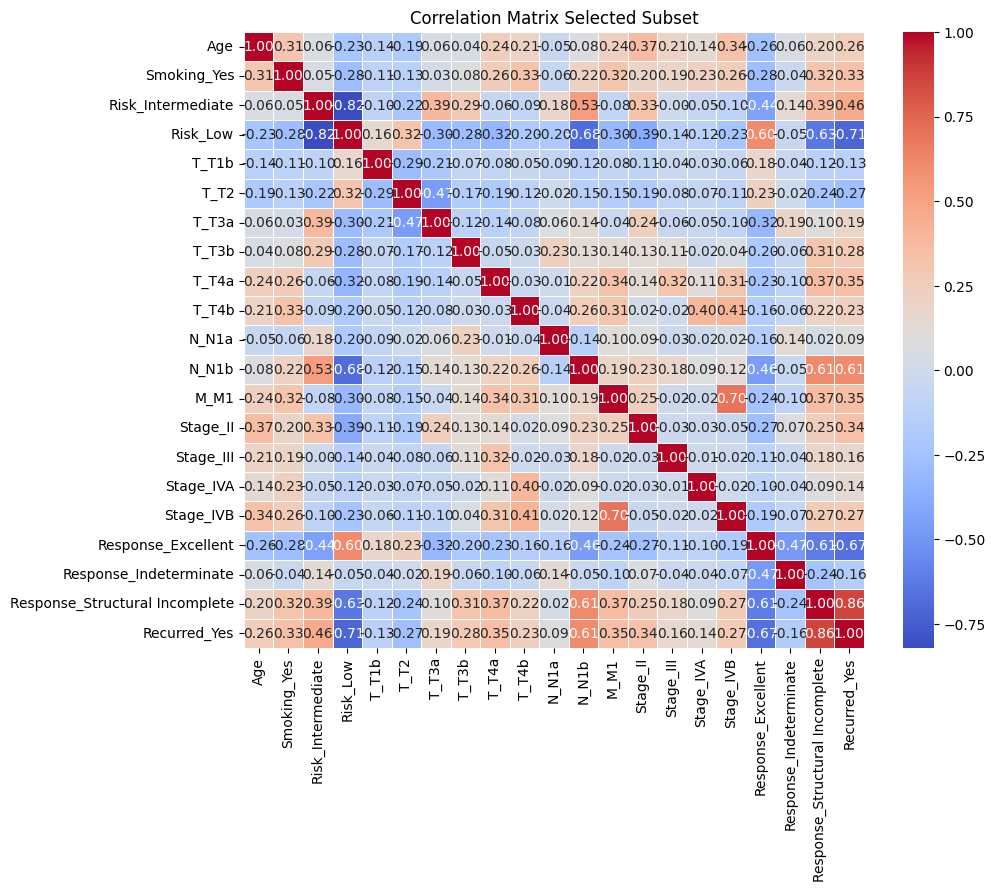

In [18]:
selected_subset = ['Age', 'Smoking', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']


df_subset = pd.get_dummies(df[selected_subset + ['Recurred']], drop_first=True)

correlation_matrix_subset = df_subset.corr()

plt.figure(figsize= (10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Selected Subset')